# О датасете

Околоземные объекты — это астероиды и кометы, орбиты которых позволяют им находиться в пределах 120 миллионов миль (195 миллионов километров) от Солнца, что означает, что они могут вращаться вокруг орбиты Земли. Большинство околоземных объектов представляют собой астероиды, размер которых варьируется от примерно 10 футов (несколько метров) до почти 25 миль (40 километров) в поперечнике.

Орбита каждого объекта вычисляется путем нахождения эллиптической траектории в пространстве, которая лучше всего соответствует всем доступным наблюдениям, которые часто охватывают множество орбит за многие годы или десятилетия. По мере того, как проводится больше наблюдений, точность орбиты объекта резко улучшается, и становится возможным предсказать, где объект будет находиться через годы или даже десятилетия в будущем – и сможет ли он приблизиться к Земле.

Наша задача — на основе исторических данных NASA о небесных телах (величина, орбита, скорость, расстояние, параметры сближения и т.п.) предсказать, представляет ли конкретный объект потенциальную опасность для Земли.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv("/content/NASA Near-Earth Objects.csv")
df = df.drop('Unnamed: 0',axis='columns')
df

,id,neo_reference_id,name,name_limited,designation,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
0,2001981,2001981,1981 Midas (1973 EA),Midas,1981,15.22,True,False,2.401900,5.370812,229,APO,0.621512,2.931360,1973-03-06,2021-10-20,Near-Earth asteroid orbits which cross the Ear...
1,2002059,2002059,2059 Baboquivari (1963 UA),Baboquivari,2059,15.97,False,False,1.700415,3.802244,268,AMO,1.238537,4.047945,1963-10-16,2021-04-15,Near-Earth asteroid orbits similar to that of ...
2,2002061,2002061,2061 Anza (1960 UA),Anza,2061,16.36,False,False,1.420872,3.177167,180,AMO,1.050403,3.478155,1960-10-22,2021-06-12,Near-Earth asteroid orbits similar to that of ...
3,2002062,2002062,2062 Aten (1976 AA),Aten,2062,17.10,False,False,1.010543,2.259644,149,ATE,0.790185,1.143633,1955-12-17,2019-11-10,Near-Earth asteroid orbits similar to that of ...
4,2002063,2002063,2063 Bacchus (1977 HB),Bacchus,2063,17.28,False,False,0.930154,2.079888,143,APO,0.701397,1.454804,1977-04-24,2021-12-02,Near-Earth asteroid orbits which cross the Ear...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,54073361,54073361,(2020 UQ),NaN,2020 UQ,26.90,False,False,0.011080,0.024777,3,APO,0.608650,1.901363,2020-10-16,2020-10-19,Near-Earth asteroid orbits which cross the Ear...
23996,54073362,54073362,(2020 UR),NaN,2020 UR,27.90,False,False,0.006991,0.015633,4,APO,0.732739,1.887929,2020-10-16,2020-10-19,Near-Earth asteroid orbits which cross the Ear...
23997,54073363,54073363,(2020 US),NaN,2020 US,27.20,False,False,0.009651,0.021579,5,APO,0.788983,2.851299,2020-10-16,2020-10-21,Near-Earth asteroid orbits which cross the Ear...
23998,54073365,54073365,(2020 UT),NaN,2020 UT,27.33,False,False,0.009090,0.020325,2,AMO,1.045124,4.170737,2020-10-15,2020-10-18,Near-Earth asteroid orbits similar to that of ...


In [2]:
df.shape    # Размер датасета (Количество строк: 24000; количество признаков: 17)

(24000, 17)

In [3]:
df.head()

,id,neo_reference_id,name,name_limited,designation,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
0,2001981,2001981,1981 Midas (1973 EA),Midas,1981,15.22,True,False,2.401900,5.370812,229,APO,0.621512,2.931360,1973-03-06,2021-10-20,Near-Earth asteroid orbits which cross the Ear...
1,2002059,2002059,2059 Baboquivari (1963 UA),Baboquivari,2059,15.97,False,False,1.700415,3.802244,268,AMO,1.238537,4.047945,1963-10-16,2021-04-15,Near-Earth asteroid orbits similar to that of ...
2,2002061,2002061,2061 Anza (1960 UA),Anza,2061,16.36,False,False,1.420872,3.177167,180,AMO,1.050403,3.478155,1960-10-22,2021-06-12,Near-Earth asteroid orbits similar to that of ...
3,2002062,2002062,2062 Aten (1976 AA),Aten,2062,17.10,False,False,1.010543,2.259644,149,ATE,0.790185,1.143633,1955-12-17,2019-11-10,Near-Earth asteroid orbits similar to that of ...
4,2002063,2002063,2063 Bacchus (1977 HB),Bacchus,2063,17.28,False,False,0.930154,2.079888,143,APO,0.701397,1.454804,1977-04-24,2021-12-02,Near-Earth asteroid orbits which cross the Ear...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 24000 non-null  int64  
 1   neo_reference_id                   24000 non-null  int64  
 2   name                               24000 non-null  object 
 3   name_limited                       144 non-null    object 
 4   designation                        24000 non-null  object 
 5   absolute_magnitude_h               23992 non-null  float64
 6   is_potentially_hazardous_asteroid  24000 non-null  bool   
 7   is_sentry_object                   24000 non-null  bool   
 8   kilometers_estimated_diameter_min  23992 non-null  float64
 9   kilometers_estimated_diameter_max  23992 non-null  float64
 10  orbit_id                           24000 non-null  object 
 11  orbit_class_type                   24000 non-null  obj

Признаки


*   'id' - уникальный id, присвоенный NASA
*   'neo_reference_id' (NEO ID) - повторяет id
*   'name' - официальное имя околоземного объекта, присвоенное NASA
*   'name_limited'-  наименование без использования научных обозначений
*  'designation' - число, используемое в официальном обозначении NASA
*   'absolute_magnitude_h' - абсолютная звездная величина (М) - является мерой светимости небесного объекта в обратной логарифмической шкале астрономической величины. Определяется как равная видимой величине, которую объект имел бы,
если бы его рассматривали с расстояния ровно 10 парсек (32,6 световых лет),
без поглощения его света из-за затемнения межзвездным веществом и космической пылью.
*   'is_potentially_hazardous_asteroid' - логическое значение, которое сообщает,
представляет ли объект потенциальную угрозу для Земли или нет
*   'is_sentry_object' - логическое значение, которое сообщает,
присутствует ли объект в системе слежения за столкновениями с Землей
*   'kilometers_estimated_diameter_min' - минимальный расчетный диаметр в километрах
*  'kilometers_estimated_diameter_max' - максимальный расчетный диаметр в километрах
*   'orbit_id' - уникальный id орбиты объекта
*   'orbit_class_type' - классификация орбит
*   'perihelion_distance' - перигелийное расстояние (ближайшая к Земле точка на пути вращающегося небесного тела)
*   'aphelion_distance' - афелийное расстояние (точка на орбите планеты, астероида или др. объекта, в которой он находится дальше всего от Земли)
*   'first_observation_date' - дата, когда объект был впервые замечен
*   'last_observation_date' - дата, когда объект наблюдался последний раз
*  'orbit_class_description' - описание орбиты

In [5]:
df.describe()

,id,neo_reference_id,absolute_magnitude_h,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,perihelion_distance,aphelion_distance
count,2.400000e+04,2.400000e+04,23992.000000,23992.000000,23992.000000,24000.000000,24000.000000
mean,7.275111e+06,7.275111e+06,22.942274,0.167777,0.375160,0.915225,2.653104
std,1.333987e+07,1.333987e+07,2.952871,0.293000,0.655169,0.232201,4.468233
min,2.001981e+06,2.001981e+06,12.580000,0.000609,0.001362,0.070431,0.653754
25%,3.409962e+06,3.409962e+06,20.650000,0.024241,0.054205,0.785150,1.706281
50%,3.703790e+06,3.703790e+06,23.200000,0.060891,0.136157,0.965325,2.480109
75%,3.803897e+06,3.803897e+06,25.200000,0.197040,0.440595,1.068984,3.397965
max,5.408749e+07,5.408749e+07,33.200000,8.101305,18.115068,1.299988,631.895456


*   min – минимальное значение признака
*   max – максимальное значение признака
*   mean – среднее значение
*   std – среднеквадратическое отклонение
*   25% – первый квартиль – значение, ниже которого лежит 25% значений
*   50% – медиана – значение, 50% значений меньше которого, а другие 50% больше
*   75% – третий квартиль – значение, ниже которого лежит около 75% значений

Матрица корреляции для числовых признаков

In [6]:
corrMatrix = df.select_dtypes(include=['float64']).corr()
corrMatrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,absolute_magnitude_h,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,perihelion_distance,aphelion_distance
absolute_magnitude_h,1.000000,-0.715415,-0.715415,-0.036526,-0.074962
kilometers_estimated_diameter_min,-0.715415,1.000000,1.000000,-0.003524,0.054581
kilometers_estimated_diameter_max,-0.715415,1.000000,1.000000,-0.003524,0.054581
perihelion_distance,-0.036526,-0.003524,-0.003524,1.000000,0.052073
aphelion_distance,-0.074962,0.054581,0.054581,0.052073,1.000000


Наблюдается линейная корреляция у kilometers_estimated_diameter_min и kilometers_estimated_diameter_max. Также оба эти признака сильно коррелируют с absolute_magnitude_h

# Обработка пропущенных значений

In [7]:
df.isnull().sum()

,0
id,0
neo_reference_id,0
name,0
name_limited,23856
designation,0
absolute_magnitude_h,8
is_potentially_hazardous_asteroid,0
is_sentry_object,0
kilometers_estimated_diameter_min,8
kilometers_estimated_diameter_max,8


Наблюдается примерно 99% пропущеных значений у name_limited

In [8]:
df['kilometers_estimated_diameter_max']=df['kilometers_estimated_diameter_max'].fillna(df['kilometers_estimated_diameter_max'].mean())
df['kilometers_estimated_diameter_min']=df['kilometers_estimated_diameter_min'].fillna(df['kilometers_estimated_diameter_min'].mean())
df['absolute_magnitude_h']=df['absolute_magnitude_h'].fillna(df['absolute_magnitude_h'].mean())

junk_features = ['id','neo_reference_id', 'name', 'name_limited','designation','orbit_id']
for i in junk_features:
    df=df.drop(i,axis='columns')

In [9]:
df.head()

,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
0,15.22,True,False,2.401900,5.370812,APO,0.621512,2.931360,1973-03-06,2021-10-20,Near-Earth asteroid orbits which cross the Ear...
1,15.97,False,False,1.700415,3.802244,AMO,1.238537,4.047945,1963-10-16,2021-04-15,Near-Earth asteroid orbits similar to that of ...
2,16.36,False,False,1.420872,3.177167,AMO,1.050403,3.478155,1960-10-22,2021-06-12,Near-Earth asteroid orbits similar to that of ...
3,17.10,False,False,1.010543,2.259644,ATE,0.790185,1.143633,1955-12-17,2019-11-10,Near-Earth asteroid orbits similar to that of ...
4,17.28,False,False,0.930154,2.079888,APO,0.701397,1.454804,1977-04-24,2021-12-02,Near-Earth asteroid orbits which cross the Ear...


In [10]:
print(df.orbit_class_type.unique())
print(df.orbit_class_description.unique())

['APO' 'AMO' 'ATE' 'IEO']
['Near-Earth asteroid orbits which cross the Earth’s orbit similar to that of 1862 Apollo'
 'Near-Earth asteroid orbits similar to that of 1221 Amor'
 'Near-Earth asteroid orbits similar to that of 2062 Aten'
 'An asteroid orbit contained entirely within the orbit of the Earth - Interior Earth Object']


# Обработка категориальных признаков

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
needed_encoding = ['orbit_class_type','orbit_class_description','is_potentially_hazardous_asteroid','is_sentry_object']
for i in needed_encoding:
    df[i]=label_encoder.fit_transform(df[i])
df.head()

,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
0,15.22,1,0,2.401900,5.370812,1,0.621512,2.931360,1973-03-06,2021-10-20,3
1,15.97,0,0,1.700415,3.802244,0,1.238537,4.047945,1963-10-16,2021-04-15,1
2,16.36,0,0,1.420872,3.177167,0,1.050403,3.478155,1960-10-22,2021-06-12,1
3,17.10,0,0,1.010543,2.259644,2,0.790185,1.143633,1955-12-17,2019-11-10,2
4,17.28,0,0,0.930154,2.079888,1,0.701397,1.454804,1977-04-24,2021-12-02,3


Обработка дат

In [12]:
date1=df['first_observation_date']
date2=df['last_observation_date']
date1=np.array(date1)
date2=np.array(date2)
for i in range(0,len(date1)):
    date1[i]=date1[i][:4]
    date2[i]=date2[i][:4]
date1=pd.DataFrame(date1)
date2=pd.DataFrame(date2)
df['first_observation_date']=date1
df['last_observation_date']=date2
df['first_observation_date']=label_encoder.fit_transform(df['first_observation_date'])
df['last_observation_date']=label_encoder.fit_transform(df['last_observation_date'])

Визуализация данных

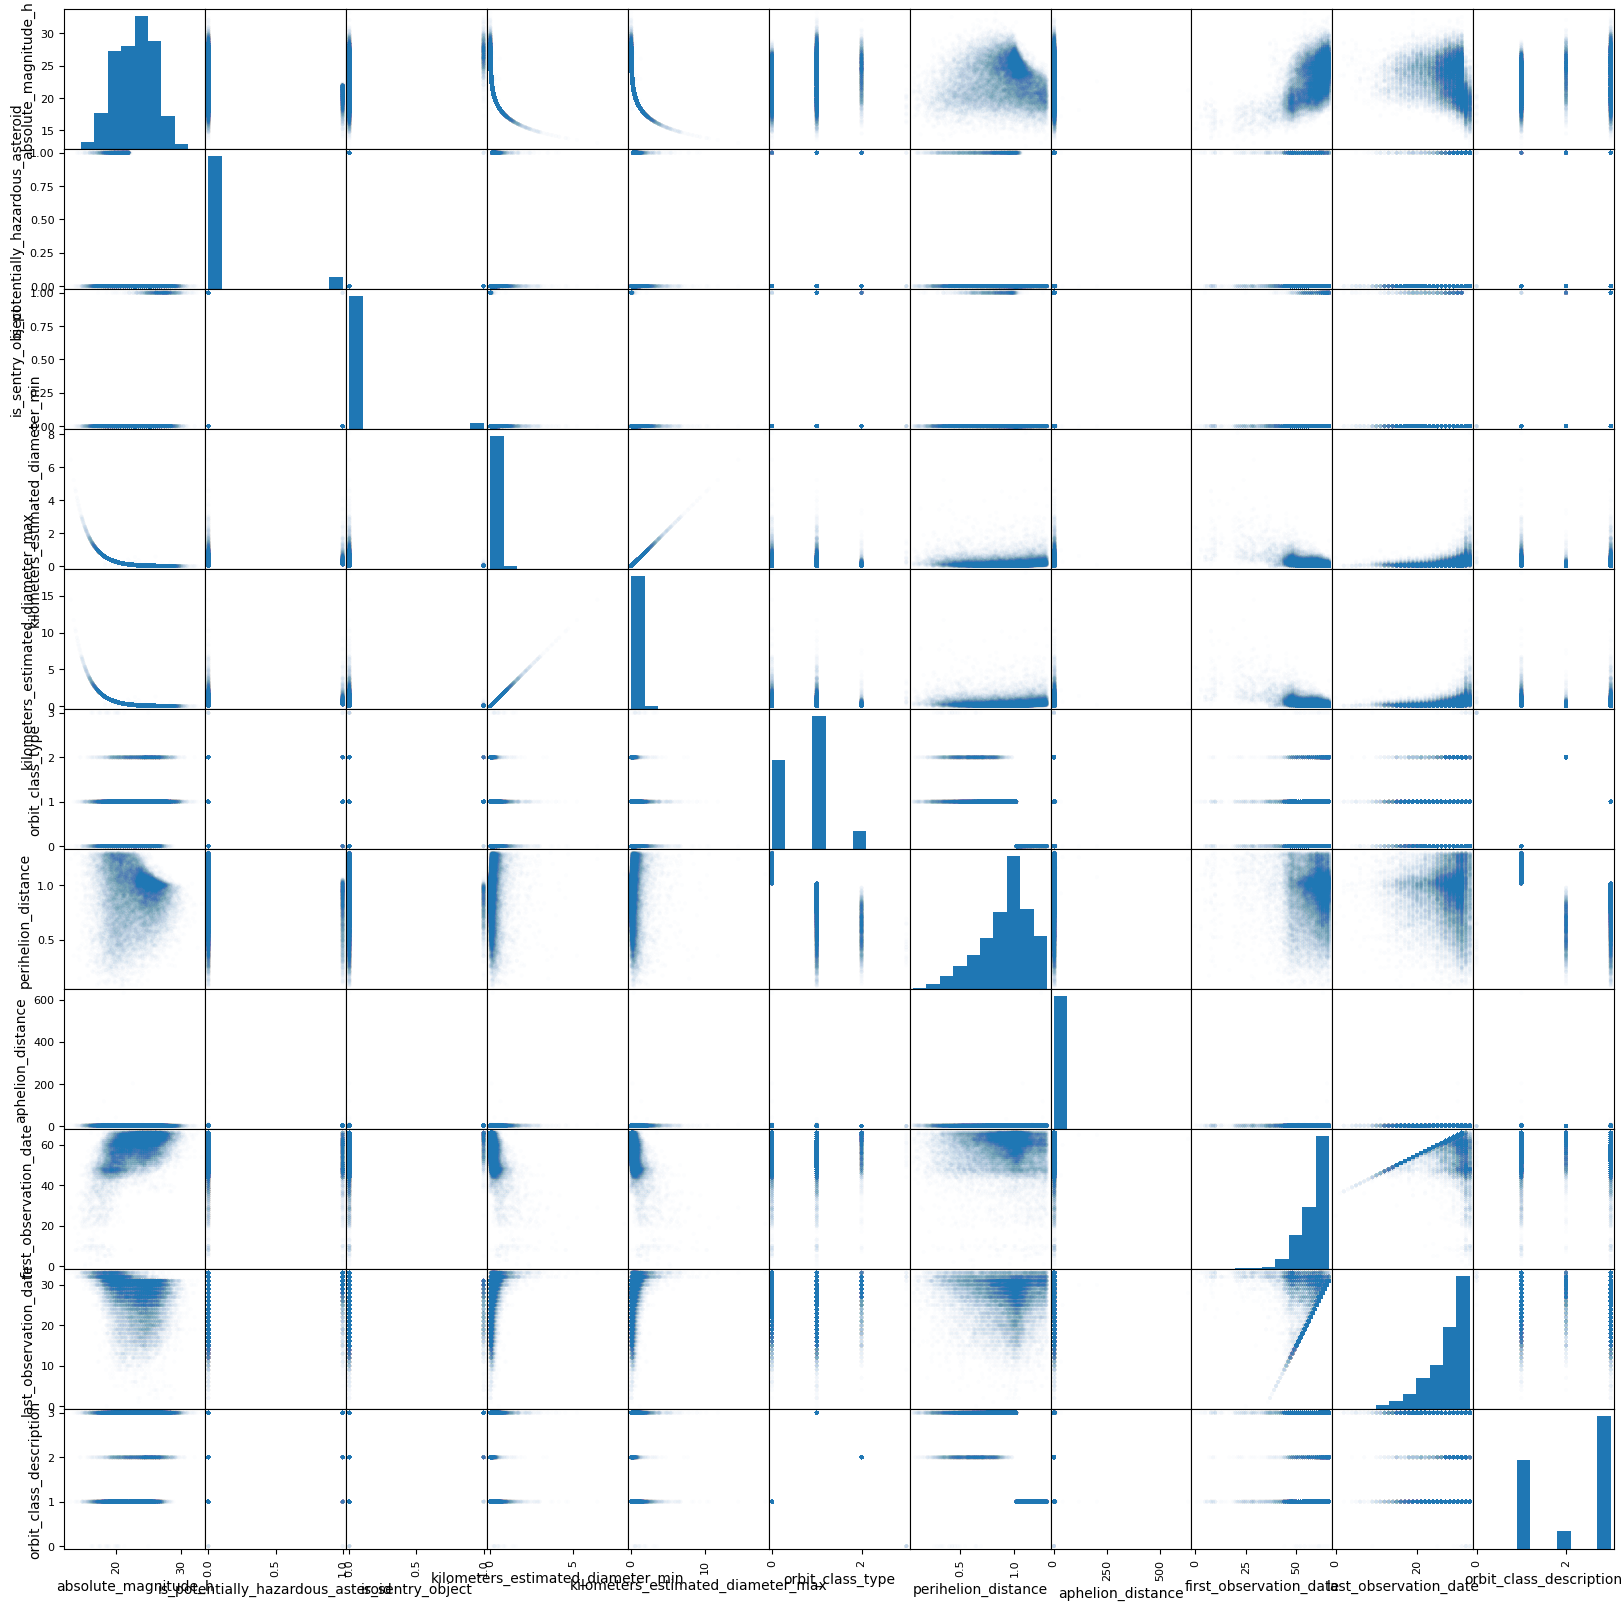

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = .01, figsize = (20, 20))
pass

In [14]:
df.corr()

,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
absolute_magnitude_h,1.000000,-0.298132,0.283209,-0.715316,-0.715316,0.209890,-0.036516,-0.074962,0.520848,-0.250442,0.196812
is_potentially_hazardous_asteroid,-0.298132,1.000000,-0.058774,0.174999,0.174999,0.167690,-0.206415,0.009947,-0.202053,0.100948,0.201525
is_sentry_object,0.283209,-0.058774,1.000000,-0.109333,-0.109333,0.136328,-0.090673,-0.006609,0.048992,-0.105523,0.154503
kilometers_estimated_diameter_min,-0.715316,0.174999,-0.109333,1.000000,1.000000,-0.096205,-0.003524,0.054580,-0.589966,0.262973,-0.080573
kilometers_estimated_diameter_max,-0.715316,0.174999,-0.109333,1.000000,1.000000,-0.096205,-0.003524,0.054580,-0.589966,0.262973,-0.080573
orbit_class_type,0.209890,0.167690,0.136328,-0.096205,-0.096205,1.000000,-0.739767,-0.090489,0.043575,-0.005666,0.736385
perihelion_distance,-0.036516,-0.206415,-0.090673,-0.003524,-0.003524,-0.739767,1.000000,0.052073,0.000888,-0.036527,-0.612899
aphelion_distance,-0.074962,0.009947,-0.006609,0.054580,0.054580,-0.090489,0.052073,1.000000,-0.007686,-0.009332,-0.033282
first_observation_date,0.520848,-0.202053,0.048992,-0.589966,-0.589966,0.043575,0.000888,-0.007686,1.000000,0.209538,0.052052
last_observation_date,-0.250442,0.100948,-0.105523,0.262973,0.262973,-0.005666,-0.036527,-0.009332,0.209538,1.000000,-0.027406


Визуализируем корреляцию всех признаков

<Axes: >

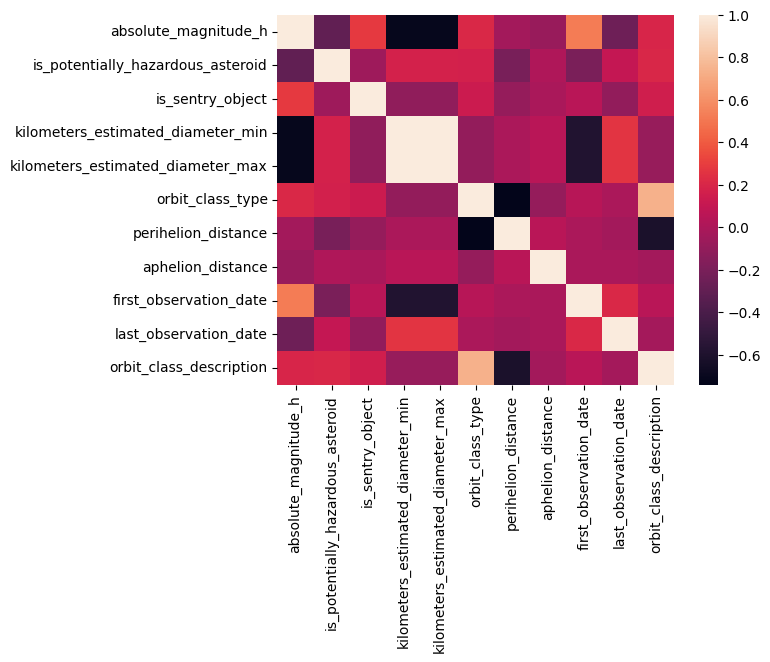

In [15]:
sns.heatmap(df.corr())

In [16]:
df.describe()

,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,22.942274,0.087250,0.044417,0.167777,0.375160,0.705625,0.915225,2.653104,57.866833,27.190375,2.178333
std,2.952379,0.282207,0.206023,0.292951,0.655059,0.603518,0.232201,4.468233,7.938349,4.837495,0.946300
min,12.580000,0.000000,0.000000,0.000609,0.001362,0.000000,0.070431,0.653754,0.000000,0.000000,0.000000
25%,20.657500,0.000000,0.000000,0.024241,0.054205,0.000000,0.785150,1.706281,54.000000,25.000000,1.000000
50%,23.200000,0.000000,0.000000,0.060891,0.136157,1.000000,0.965325,2.480109,60.000000,29.000000,3.000000
75%,25.200000,0.000000,0.000000,0.196361,0.439077,1.000000,1.068984,3.397965,64.000000,31.000000,3.000000
max,33.200000,1.000000,1.000000,8.101305,18.115068,3.000000,1.299988,631.895456,66.000000,33.000000,3.000000


*   min – минимальное значение признака
*   max – максимальное значение признака
*   mean – среднее значение
*   std – среднеквадратическое отклонение
*   25% – первый квартиль – значение, ниже которого лежит 25% значений
*   50% – медиана – значение, 50% значений меньше которого, а другие 50% больше
*   75% – третий квартиль – значение, ниже которого лежит около 75% значений

In [17]:
df.groupby('is_potentially_hazardous_asteroid').mean()

,absolute_magnitude_h,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
is_potentially_hazardous_asteroid,,,,,,,,,,
0,23.214405,0.048160,0.151927,0.339719,0.674336,0.930043,2.639363,58.362732,27.039396,2.119374
1,20.095419,0.005253,0.333589,0.745928,1.032951,0.760204,2.796859,52.679083,28.769819,2.795129


# Классификатор ближайших соседей и классификатор дерева решений. Случайный лес

In [18]:
X=np.array(df[['absolute_magnitude_h',
       'is_sentry_object', 'kilometers_estimated_diameter_min',
       'kilometers_estimated_diameter_max', 'orbit_class_type',
       'perihelion_distance', 'aphelion_distance', 'first_observation_date',
       'last_observation_date', 'orbit_class_description']])
y=np.array(df['is_potentially_hazardous_asteroid'])

Разбиение на обучающую и тестовую выборки

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

Я использовала метод k ближайших соседей (KNN). Это один из наиболее интуитивно понятных алгоритмов машинного обучения, эффективный при небольшом числе признаков. Метод имеет гиперпараметр (кол-во ближайших соседей), что позволяет легко настроить модель через кросс-валидацию и повысить качество предсказаний без значительных вычислительных затрат.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=3)      #Классификатор ближайших соседей
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()                 #Классификатор дерева решений

In [21]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
print(model1," ",model1.score(X_test,y_test))
print(model2," ",model2.score(X_test,y_test))

KNeighborsClassifier(n_neighbors=3)   0.8976666666666666
DecisionTreeClassifier()   0.905


In [22]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 4, 5, 10, 15, 20, 25]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_                      #Лучшее значение ошибки
best_n_neighbors = grid.best_estimator_.n_neighbors     #Выбор оптимального значения гиперпараметра
print(best_cv_err, best_n_neighbors)

0.0852222222222222 20


In [23]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.07811111111111112 0.08683333333333333


Получили ошибки на обучающей и тестовой выборках. Так, получаем оптимальное значение гиперпараметра = 20. Ошибка при этом = 0.085. Модель KNN хорошо подходит для прогнозирования

# Логистическая регрессия

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn import metrics

In [25]:
model = LogisticRegression(n_jobs = -1)

In [26]:
model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [27]:
pred_proba = model.predict_proba(X_test)[:,1]

Accuracy

In [28]:
accuracy_score(y_train, model.predict(X_train))

0.9088888888888889

In [29]:
accuracy_score(y_test, model.predict(X_test))

0.918

Вычисление ошибки на обучающей и тестовой выборке

In [30]:
err_train = np.mean(y_train != model.predict(X_train))
err_test  = np.mean(y_test  != model.predict(X_test))

print(err_train, err_test)

0.09111111111111111 0.082


ROC-AUC

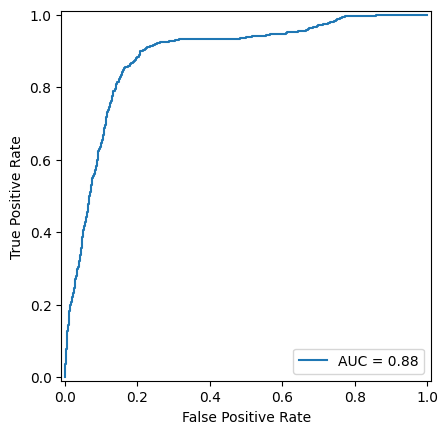

In [31]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

Confusion matrix

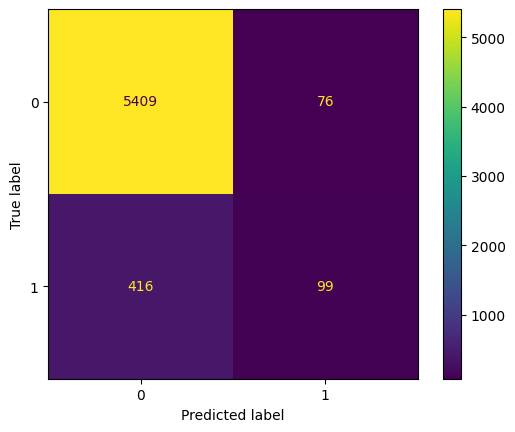

In [32]:
cm = confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot()
plt.show()

# Random forest

In [33]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()

In [34]:
grid = GridSearchCV(rf, cv=5, param_grid = {'max_depth': [3, 6, 9],
    'min_samples_leaf': [3, 6, 9]},scoring='roc_auc',verbose = 2)

In [35]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ....................max_depth=3, min_samples_leaf=3; total time=   1.4s
[CV] END ....................max_depth=3, min_samples_leaf=3; total time=   2.4s
[CV] END ....................max_depth=3, min_samples_leaf=3; total time=   2.4s
[CV] END ....................max_depth=3, min_samples_leaf=3; total time=   2.3s
[CV] END ....................max_depth=3, min_samples_leaf=3; total time=   4.0s
[CV] END ....................max_depth=3, min_samples_leaf=6; total time=   2.7s
[CV] END ....................max_depth=3, min_samples_leaf=6; total time=   2.0s
[CV] END ....................max_depth=3, min_samples_leaf=6; total time=   1.9s
[CV] END ....................max_depth=3, min_samples_leaf=6; total time=   2.0s
[CV] END ....................max_depth=3, min_samples_leaf=6; total time=   2.1s
[CV] END ....................max_depth=3, min_samples_leaf=9; total time=   3.6s
[CV] END ....................max_depth=3, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9], 'min_samples_leaf': [3, 6, 9]},
             scoring='roc_auc', verbose=2)

In [36]:
grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 6}

In [37]:
rfst = ensemble.RandomForestClassifier(max_depth = grid.best_params_['max_depth'],min_samples_leaf = grid.best_params_['min_samples_leaf'])
rfst.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=6)

Accuracy

In [38]:
accuracy_score(y_train, rfst.predict(X_train))

0.9347222222222222

In [39]:
accuracy_score(y_test, rfst.predict(X_test))

0.92

Вычисление ошибки на обучающей и тестовой выборке

In [40]:
err_train = np.mean(y_train != rfst.predict(X_train))
err_test  = np.mean(y_test  != rfst.predict(X_test))

print(err_train, err_test)

0.06527777777777778 0.08


Confusion matrix

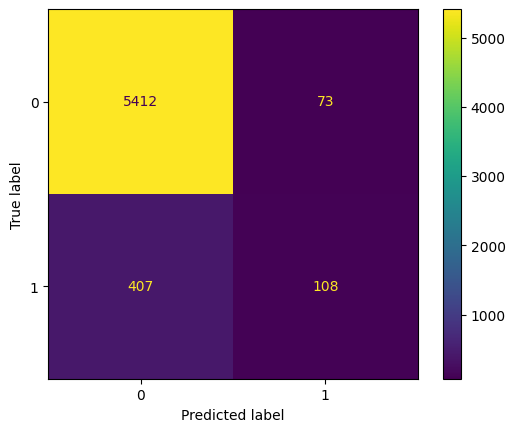

In [41]:
cm = confusion_matrix(y_test, rfst.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfst.classes_)
disp.plot()
plt.show()

MLP

In [42]:
from sklearn.neural_network import MLPClassifier

In [43]:
model = MLPClassifier(hidden_layer_sizes=[100, 150])

In [44]:
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=[100, 150])

In [45]:
accuracy_score(y_train, model.predict(X_train))

0.9199444444444445

In [46]:
accuracy_score(y_test, model.predict(X_test))

0.9173333333333333

Вычисление ошибки на обучающей и тестовой выборке

In [47]:
err_train = np.mean(y_train != model.predict(X_train))
err_test  = np.mean(y_test  != model.predict(X_test))

print(err_train, err_test)

0.08005555555555556 0.08266666666666667


Ниже представлены графики зависимости ошибки на тесте от числа нейронов и параметра альфа

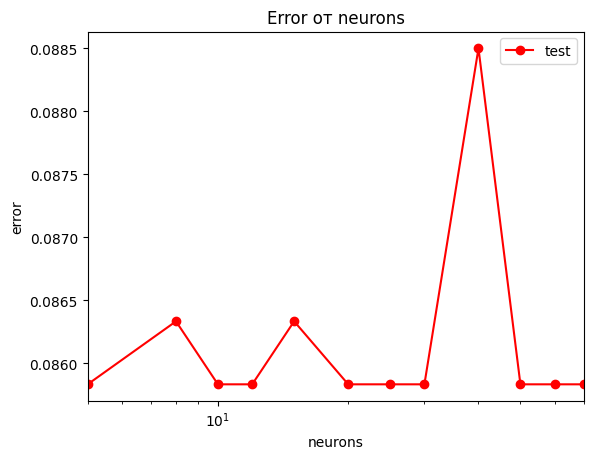

In [48]:
err_test = []

neurons = [5, 8, 10, 12, 15, 20, 25, 30, 40, 50, 60, 70]

for n in neurons:
    mlp_model = MLPClassifier(hidden_layer_sizes = (n,2),
                              activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)
    err_test.append(np.mean(y_test != mlp_model.predict(X_test)))

plt.semilogx(neurons, err_test, 'r-o', label = 'test')
plt.xlim([np.min(neurons), np.max(neurons)])
plt.title('Error от neurons')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()

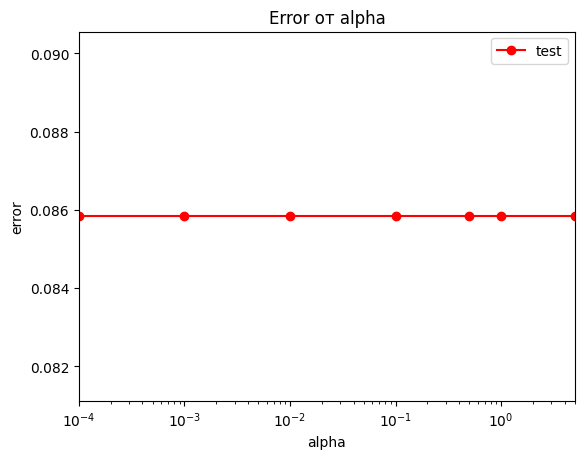

In [49]:
err_test = []

alpha = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5]

for al in alpha:
    mlp_model = MLPClassifier(hidden_layer_sizes = (10,2),
                              activation = 'logistic', alpha = al, max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)
    err_test.append(np.mean(y_test != mlp_model.predict(X_test)))

plt.semilogx(alpha, err_test, 'r-o', label = 'test')
plt.xlim([np.min(alpha), np.max(alpha)])
plt.title('Error от alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

lr = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
lr.fit(X_train, y_train)

models = [("KNN", knn), ("Random Forest", rf), ("Logistic Regression", lr)]

for name, model in models:
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, zero_division=0))
    print("F1:", f1_score(y_test, y_pred, zero_division=0))


KNN
Accuracy: 0.9131666666666667
Precision: 0.4819277108433735
Recall: 0.1553398058252427
F1: 0.23494860499265785

Random Forest
Accuracy: 0.9181666666666667
Precision: 0.5338983050847458
Recall: 0.36699029126213595
F1: 0.43498273878020716

Logistic Regression
Accuracy: 0.8408333333333333
Precision: 0.34285714285714286
Recall: 0.9320388349514563
F1: 0.5013054830287206


# Итог

Мы обучили логистическую регрессию и случайный лес, для случайного леса мы подобрали оптимальные значения гиперпараметров. Построили confusion matrix. Переобучения не наблюдается.На тесте наименьшее значение ошибки получилось у случайного леса. Наибольшее значение accuracy на тесте получилось у случайного леса соответственно. Для MLP значение ошибки на тесте судя по графику не зависит от параметра альфа, но зависит от числа нейронов.

1. Если цель — максимально надёжная модель с балансом precision/recall, то выбираем Random Forest.

2. Если цель — минимизировать пропуск опасных астероидов, то выбираем Logistic Regression.

3. KNN проигрывает обеим моделям и не подходит для дисбалансированных данных.

In [51]:
# Борьба с несбалансированностью
from collections import Counter
import pandas as pd

print("До oversampling:", Counter(y_train))

def oversample(X, y):
    Xy = pd.DataFrame(X)
    Xy['target'] = y
    counts = Xy['target'].value_counts()
    if counts.min() / counts.max() < 0.6:
        majority = Xy[Xy['target'] == counts.idxmax()]
        minority = Xy[Xy['target'] == counts.idxmin()]
        minority_up = minority.sample(n=len(majority), replace=True, random_state=42)
        df_up = pd.concat([majority, minority_up])
        return df_up.drop(columns=['target']).values, df_up['target'].values
    return X, y

X_train_os, y_train_os = oversample(X_train, y_train)
print("После oversampling:", Counter(y_train_os))

До oversampling: Counter({np.int64(0): 16421, np.int64(1): 1579})
После oversampling: Counter({np.int64(0): 16421, np.int64(1): 16421})


In [52]:
# Удаление коррелированных переменных
import numpy as np

X_df = pd.DataFrame(X_train, columns=[f'feature_{{i}}' for i in range(X_train.shape[1])])
corr = X_df.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [c for c in upper.columns if any(upper[c] > 0.85)]

print("Удаляем признаки:", to_drop)

X_train_reduced = X_df.drop(columns=to_drop)
print("Новая размерность X_train:", X_train_reduced.shape)

Удаляем признаки: ['feature_{i}', 'feature_{i}', 'feature_{i}', 'feature_{i}', 'feature_{i}', 'feature_{i}', 'feature_{i}', 'feature_{i}', 'feature_{i}', 'feature_{i}']
Новая размерность X_train: (18000, 0)


**Выводы:**  

- Метод ближайших соседей (KNN) показал базовые результаты; были протестированы RandomForest и LogisticRegression.  
- Oversampling улучшил баланс классов.  
- Удаление коррелированных признаков уменьшило переобучение и ускорило обучение.  


In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA до 2 компонент для визуализации
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X_scaled)

print("Доля объяснённой дисперсии PCA:", pca.explained_variance_ratio_)

Доля объяснённой дисперсии PCA: [0.32875143 0.23439586]


PCA позволяет визуализировать данные, однако значительная часть информации остаётся в других измерениях. Поэтому визуальная разделимость классов в 2D-пространстве ограничена и не гарантирует успешную кластеризацию.

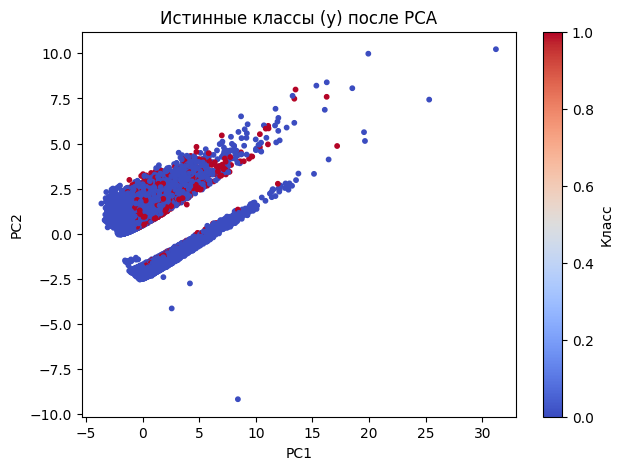

In [54]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', s=10)
plt.title("Истинные классы (y) после PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Класс")
plt.show()

Классы сильно перекрываются. Нет чётко разделимых областей

Признаковое пространство не содержит явно отделимых кластеров, соответствующих целевой метке.

In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)

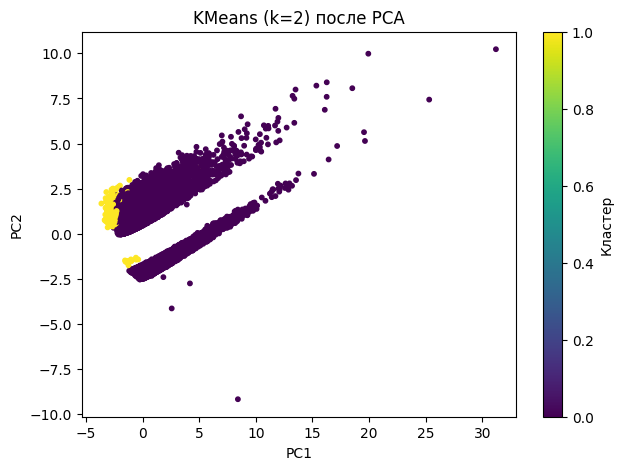

In [56]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='viridis', s=10)
plt.title("KMeans (k=2) после PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Кластер")
plt.show()

KMeans не смог восстановить истинные классы. Отрицательный ARI (см. ниже)указывает, что разбиение хуже случайного, что типично, если классы не имеют кластерной структуры.

In [57]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.7, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Проверим, какие кластеры получились
set(dbscan_labels)

{np.int64(-1),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7)}

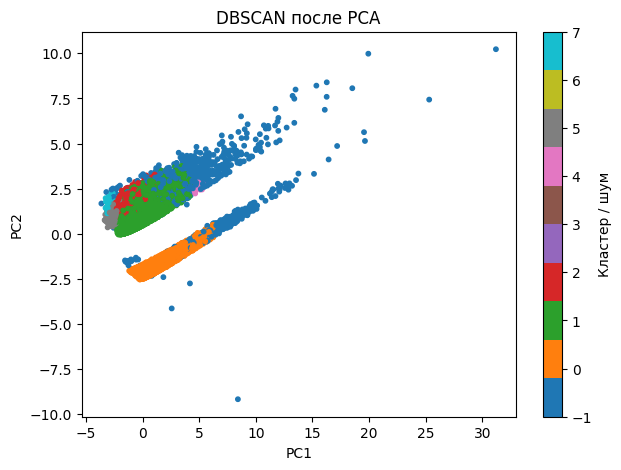

In [58]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels, cmap='tab10', s=10)
plt.title("DBSCAN после PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Кластер / шум")
plt.show()

Было найдено несколько кластеров + шум. Алгоритм хорошо выделяет плотные области, но они не соответствуют классам.

In [59]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(X_scaled)

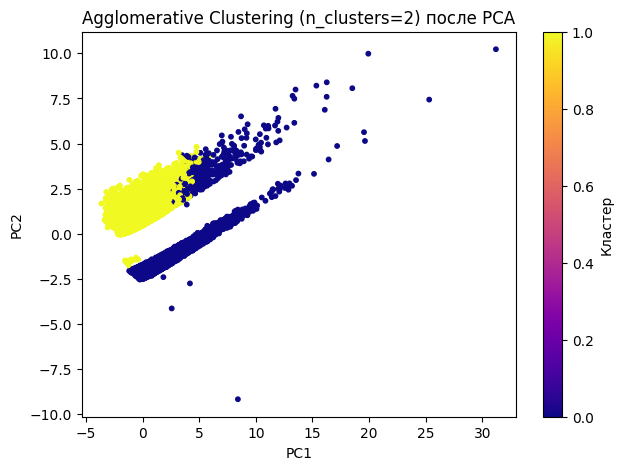

In [60]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=agg_labels, cmap='plasma', s=10)
plt.title("Agglomerative Clustering (n_clusters=2) после PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Кластер")
plt.show()

Разделение похоже на KMeans. Также основано на расстояниях, а не на классовой структуре.
Иерархическая кластеризация также не выявила структуру, согласующуюся с целевой переменной.

In [61]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

print("KMeans:")
print("ARI:", adjusted_rand_score(y, kmeans_labels))
print("NMI:", normalized_mutual_info_score(y, kmeans_labels))

print("\nDBSCAN:")
# Уберём шум для корректного сравнения
mask = dbscan_labels != -1
print("ARI:", adjusted_rand_score(y[mask], dbscan_labels[mask]))
print("NMI:", normalized_mutual_info_score(y[mask], dbscan_labels[mask]))

print("\nAgglomerative:")
print("ARI:", adjusted_rand_score(y, agg_labels))
print("NMI:", normalized_mutual_info_score(y, agg_labels))

KMeans:
ARI: -0.04692517012973639
NMI: 0.01110976548911612

DBSCAN:
ARI: -0.018629149444539618
NMI: 0.04575457807400762

Agglomerative:
ARI: -0.027882749648164597
NMI: 0.03567655861515003


В результате применения методов обучения без учителя мы увидели, что данные не обладают выраженной кластерной структурой, соответствующей целевой переменной. Низкие и отрицательные значения ARI и NMI свидетельствуют о слабом соответствии кластеров истинным меткам. Это указывает на то, что задача определения опасных околоземных объектов является задачей классификации, а не кластеризации, и требует использования методов обучения с учителем.